# *Sales Analysis* 

##### *Using Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of electronics store sales data*

##### *Importing libraries*

In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('error', category=DeprecationWarning)

##### *Merging 12 months of sales data into a single csv*

In [88]:
files = [file for file in os.listdir("SalesAnalysis/Sales_Data")]
all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv("all_data.csv", index = False)


##### *Cleaning in updated data*

In [89]:
all_data = pd.read_csv("all_data.csv")
all_data = all_data.dropna(how = "all")
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### *Question 1: What was the best month for sales? How much was earned that month?*


In [90]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [91]:
results = all_data.groupby("Month").sum()[["Quantity Ordered", "Sales"]]
results.head(12)

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


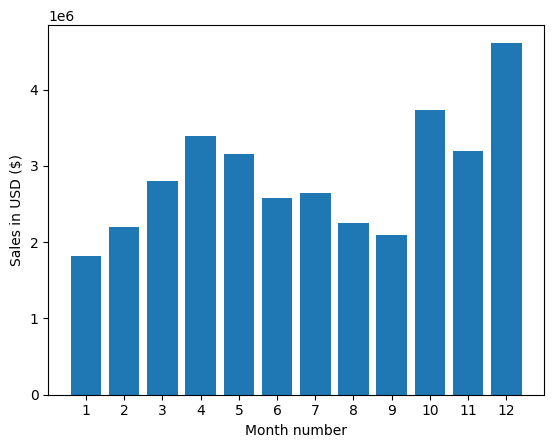

In [92]:
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")        

plt.show()

### *Question 2: Which city had the highest number of sales?*

In [93]:
def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]

all_data["City Name"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
results = all_data.groupby("City Name").sum()
                                          
                                                           

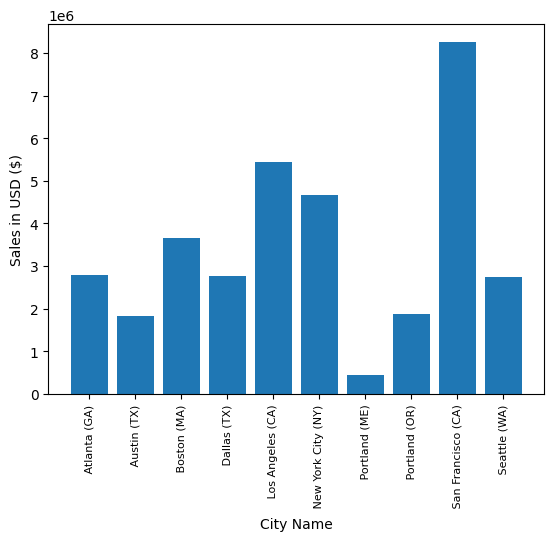

In [94]:
cities = [city for city, _ in all_data.groupby("City Name")]

plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
       
  
plt.show()

### *Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?* 

In [111]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data["Count"] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


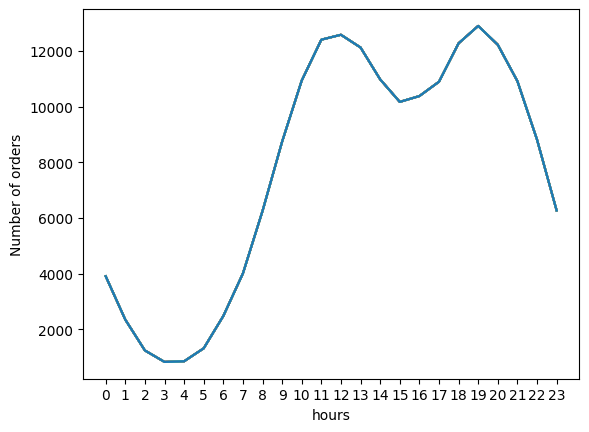

In [96]:
hours = [hour for hour, _ in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.ylabel("Number of orders")
plt.xlabel("hours")
plt.show()


##### *"My recomendation is around 11am (11) or 7pm (19)"*

### *Question 4: What products are most often sold together?*  

In [112]:
dup_data = all_data[all_data["Order ID"].duplicated(keep = False)]
dup_data["Grouped"] =  dup_data.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
dup_data = dup_data[["Order ID", "Grouped"]].drop_duplicates()
dup_data.head(10)


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [109]:
count = Counter()
for row in dup_data["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]